# Supervised methods - Classification

# Classification

Classification is a supervised method to recognise and group data objects into a pre-determined categories. Where regression uses labelled observations to predict a continuous numerical value, classification predicts a discrete categorical fit to a class. Classification in ML leverages a wide range of algorithms to classify a set of data/datasets into their respective categories.

In this episode we are going to introduce the concept of supervised classification by classifying penguin data into different species of penguins using Scikit-Learn.

## The penguins dataset
We're going to be using the penguins dataset of Allison Horst, published [here](https://github.com/allisonhorst/palmerpenguins), The dataset contains 344 size measurements for three penguin species (Chinstrap, Gentoo and Adélie) observed on three islands in the Palmer Archipelago, Antarctica.

![*Artwork by @allison_horst*](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn/gh-pages/fig//palmer_penguins.png)

The physical attributes measured are flipper length, beak length, beak width, body mass, and sex.
![*Artwork by @allison_horst*](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn/gh-pages/fig//culmen_depth.png)

In other words, the dataset contains 344 rows with 7 features i.e. 5 physical attributes, species and the island where the observations were made.

In [1]:
import seaborn as sns

dataset = sns.load_dataset('penguins')
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Our aim is to develop a classification model that will predict the species of a penguin based upon measurements of those variables.

As a rule of thumb for modelling, it is best to start with a simple model and progressively add complexity in order to meet our desired classification performance.

For this lesson we will limit our dataset to only numerical values such as bill_length, bill_depth, flipper_length, and body_mass while we attempt to classify species.

The above table contains multiple categorical objects such as species. If we attempt to include the other categorical fields, island and sex, we might hinder classification performance due to the complexity of the data.

### Preprocessing our data

Lets do some pre-processing on our dataset and specify our `X` features and `y` labels:

In [2]:
# Extract the data we need
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dataset.dropna(subset=feature_names, inplace=True)

class_names = dataset['species'].unique()
print(class_names)

X = dataset[feature_names]
y = dataset['species']
X.head()

['Adelie' 'Chinstrap' 'Gentoo']


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Having extracted our features `X` and labels `y`, we can now split the data using the `train_test_split` function.

## Training-testing split
When undertaking any machine learning project, it's important to be able to evaluate how well your model works. 

Rather than evaluating this manually we can instead set aside some of our data, usually 20-30%, and use these as a testing dataset. We then train on the remaining 80% and use the testing dataset to evaluate the accuracy of our trained model. We lose a bit of training data in the process, But we can now easily evaluate the performance of our model. 

How we split the data into training and testing sets is also extremely important. We need to make sure that our training data is representitive of both our test data and actual data. 

For classification problems, this means we should ensure that each class of interest is represented proportionately in both the training and testing sets, so the model learns from and is evaluated on data that reflects the original class distribution. We can achieve this by using the `stratify` argument in the `train_test_split()` function, setting it equal to the target variable (`y`).

It's important to note, however, that this does *not* fix class imbalance—it simply preserves the imbalance in both splits. If one class is heavily underrepresented in the original dataset, additional techniques such as resampling (oversampling the minority class or undersampling the majority), using class weights, or applying specialized algorithms may be needed to properly address the imbalance during model training.


In [3]:
# import
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

We'll use `X_train` and `y_train` to develop our model, and only look at `X_test` and `y_test` when it's time to evaluate its performance.

### Visualising the data
In order to better understand how a model might classify this data, we can first take a look at the data visually, to see what patterns we might identify.

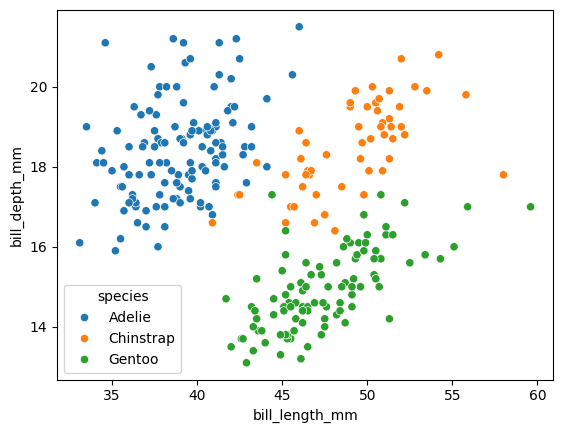

In [4]:
import matplotlib.pyplot as plt

fig01 = sns.scatterplot(X_train, x=feature_names[0], y=feature_names[1], hue=dataset['species'])
plt.show()

As there are four measurements for each penguin, we need quite a few plots to visualise all four dimensions against each other. Here is a handy Seaborn function to do so:

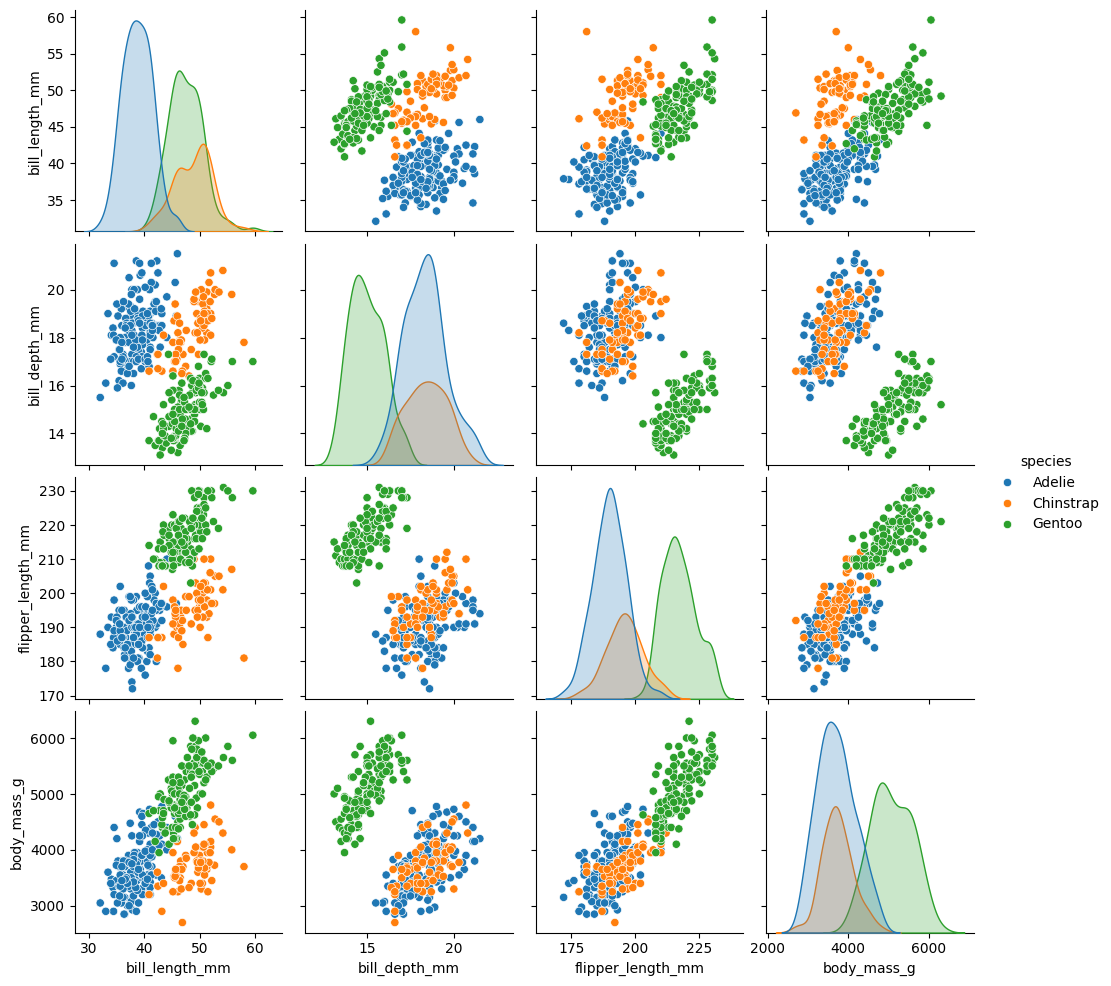

In [5]:
sns.pairplot(dataset, hue="species")
plt.show()

We can see that penguins from each species form fairly distinct spatial clusters in these plots, so that you could draw lines between those clusters to delineate each species. This is effectively what many classification algorithms do. They use the training data to delineate the observation space, in this case the 4 measurement dimensions, into classes. When given a new observation, the model finds which of those class areas the new observation falls in to.


## Classification using a decision tree
We'll first apply a decision tree classifier to the data. Decisions trees are conceptually similar to flow diagrams (or more precisely for the biologists: dichotomous keys). They split the classification problem into a binary tree of comparisons, at each step comparing a measurement to a value, and moving left or right down the tree until a classification is reached.

![Decision tree for classifying penguins](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn/gh-pages/fig//decision_tree_example.png)


Training and using a decision tree in Scikit-Learn is straightforward:

In [6]:
# import
from sklearn.tree import DecisionTreeClassifier, plot_tree

# initialize model
clf = DecisionTreeClassifier(max_depth=2)

# fit/train model
clf.fit(X_train, y_train)

# get model predictions
clf.predict(X_test)

array(['Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie'], dtype=object)

> ## Hyper-parameters: parameters that tune a model
> 'Max Depth' is an example of a *hyper-parameter* for the decision tree model. Where models use the parameters of an observation to predict a result, hyper-parameters are used to tune how a model works. Each model you encounter will have its own set of hyper-parameters, each of which affects model behaviour and performance in a different way. The process of adjusting hyper-parameters in order to improve model performance is called hyper-parameter tuning.

We can conveniently check how our model did with the .score() function, which will make predictions and report what proportion of them were accurate:

In [7]:
# calculate model score (accuracy)
clf_score = clf.score(X_test, y_test)
print(clf_score)

0.9565217391304348


Our model reports an accuracy of ~96% on the test data! We can also look at the decision tree that was generated:

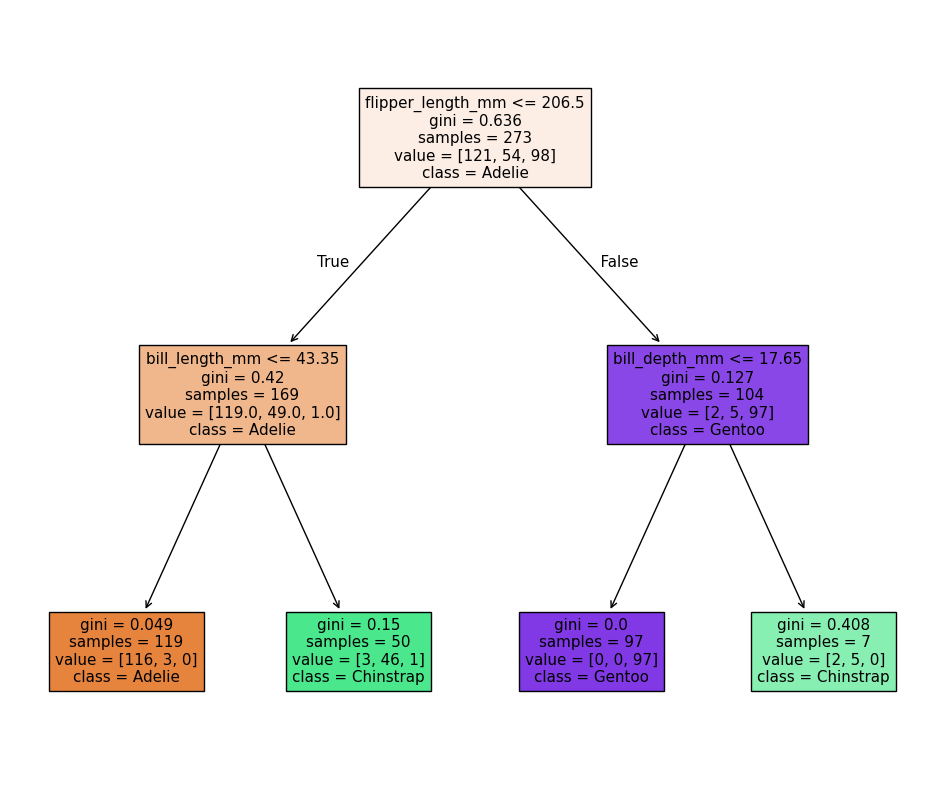

In [8]:
# plot tree
fig = plt.figure(figsize=(12, 10))
plot_tree(clf, class_names=class_names, feature_names=feature_names, filled=True, ax=fig.gca())
plt.show()

The first first question (`depth=1`) splits the training data into "Adelie" and "Gentoo" categories using the criteria `flipper_length_mm <= 206.5`, and the next two questions (`depth=2`) split the "Adelie" and "Gentoo" categories into "Adelie & Chinstrap" and "Gentoo & Chinstrap" predictions. 

### Visualising the classification space
We can visualise the classification space (decision tree boundaries) to get a more intuitive feel for what it is doing.Note that our 2D plot can only show two parameters at a time, so we will quickly visualise by training a new model on only 2 features:

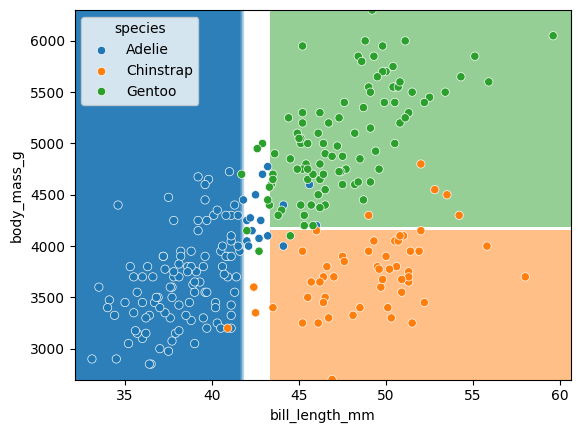

In [9]:
# import
from sklearn.inspection import DecisionBoundaryDisplay

# extract feature names (bill length and body mass)
f1 = feature_names[0]
f2 = feature_names[3]

# init model
clf = DecisionTreeClassifier(max_depth=2)

# fit/train model
clf.fit(X_train[[f1, f2]], y_train)

# plot decision boundary
d = DecisionBoundaryDisplay.from_estimator(clf, X_train[[f1, f2]])

# plot data color-coded by label
sns.scatterplot(X_train, x=f1, y=f2, hue=dataset['species'])
plt.show()

## Tuning the `max_depth` hyperparameter

Our decision tree using a `max_depth=2` is fairly simple and there are still some incorrect predictions in our final classifications. Let's try varying the `max_depth` hyperparameter to see if we can improve our model predictions.

[(1, 0.7971014492753623), (2, 0.9565217391304348), (3, 0.927536231884058), (4, 0.9565217391304348), (5, 0.9565217391304348), (6, 0.9565217391304348), (7, 0.9565217391304348), (8, 0.9565217391304348), (9, 0.9565217391304348), (10, 0.9565217391304348)]


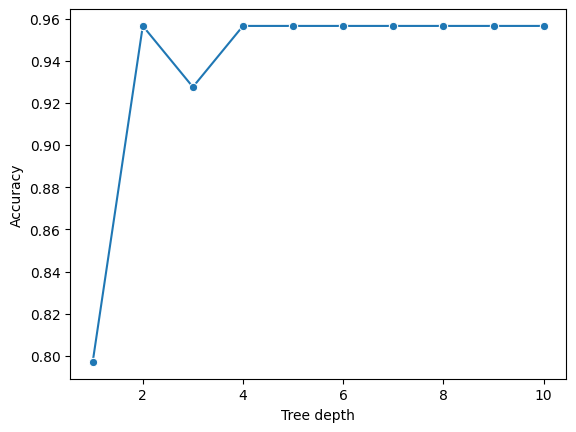

In [10]:
import pandas as pd

max_depths = list(range(1,11)) 

accuracy = []
for i, d in enumerate(max_depths):
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)

    accuracy.append((d, acc))

acc_df = pd.DataFrame(accuracy, columns=['depth', 'accuracy'])

sns.lineplot(acc_df, x='depth', y='accuracy',  marker='o')
print(accuracy)
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()

Here we can see that a `max_depth=2` gives identical performance to models with depth >3. This can seem counter intuitive, as surely more questions should be able to better split up our categories and thus give better predictions?

Let's reuse our plotting codes from above to inspect the decision boundary that has `max_depth=7`:

In [11]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


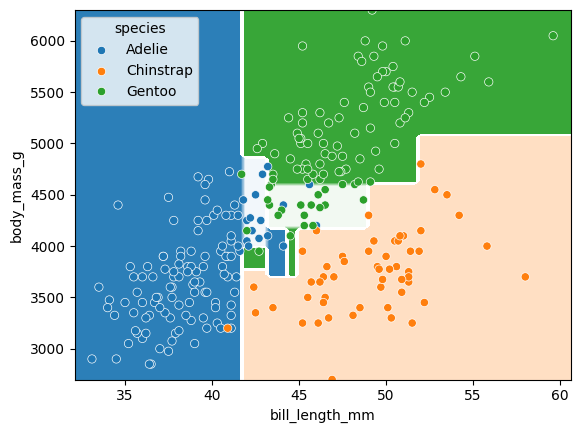

In [12]:
f1 = feature_names[0]
f2 = feature_names[3]

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=dataset['species'])#, palette='husl')
plt.show()

Since the data has well separated clusters, additional decision boundaries don't hurt the model and lead to typical overfitting effects.

> ## Exercise: Adding noise to the training data
> We observed that this data doesn't seem very susceptible to overfitting effects. Why might this be? There are at least two factors contributing to these results:
>
> 1. We only have 4 predictors. With so few predictors, there are only so many unique tree structures that can be tested/formed. This makes overfitting less likely.
> 2. Our data is sourced from a python library, and has been cleaned/vetted. Real-world data typically has more noise with overlapping clusters.
>  
> Let's try adding a small amount of noise to the data using the below code. How does this impact the ideal setting for depth level?


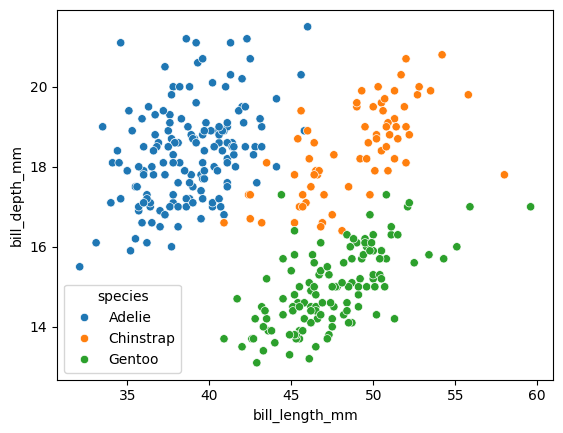

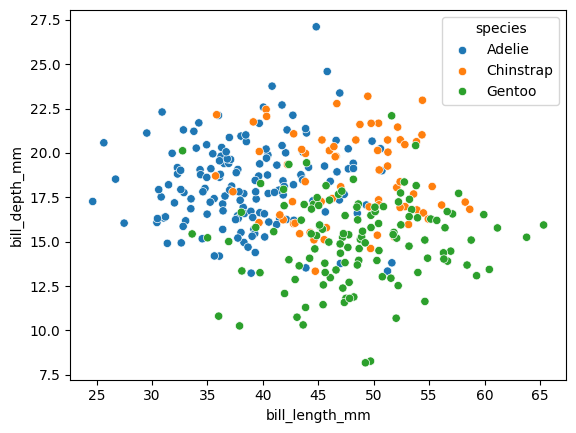

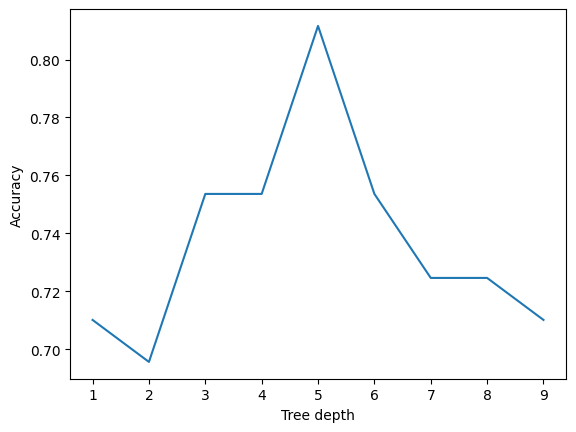

In [13]:
# 1) Load fresh copy of data 
dataset = sns.load_dataset('penguins')
dataset.head()

# 2) Extract the data we need and drop NaNs (if not done already)
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dataset.dropna(subset=feature_names, inplace=True)
class_names = dataset['species'].unique()
X = dataset[feature_names]
y = dataset['species']

# 3) ADD RANDOM NOISE TO X
stds = X.std(axis=0).to_numpy()

# Generate noise and scale it
# Set seed for reproducibility
import numpy as np
np.random.seed(42)
noise = np.random.normal(0, 1, X.shape)  # sample numbers from normal distribution
scaled_noise = noise * stds  # up to 1
X_noisy = X + scaled_noise

fig01 = sns.scatterplot(X, x=feature_names[0], y=feature_names[1], hue=dataset['species'])
plt.show()
fig02 = sns.scatterplot(X_noisy, x=feature_names[0], y=feature_names[1], hue=dataset['species'])
plt.show()

# 4) TRAIN/TEST SPLIT
X_train_noise, X_test_noise, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=0, stratify=y)

# 5) HYPERPARAM TUNING
max_depths = list(range(1, 10))
accuracy = []
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train_noise, y_train)
    acc = clf.score(X_test_noise, y_test)
    accuracy.append((d, acc))

acc_df = pd.DataFrame(accuracy, columns=['depth', 'accuracy'])

sns.lineplot(acc_df, x='depth', y='accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()

This is a much more typical looking model complexity vs. accuracy plot. In many applications, you will see an inverted U. Models that are too simple can have poor predictive power. Models that are too complex can "overfit" to noise in the data, leading to poorer performance on new test data.


## Classification using support vector machines
Next, we'll look at another commonly used classification algorithm, and see how it compares. Support Vector Machines (SVM) work in a way that is conceptually similar to your own intuition when first looking at the data. They devise a set of hyperplanes that delineate the parameter space, such that each region contains ideally only observations from one class, and the boundaries fall between classes. One of the core strengths of Support Vector Machines (SVMs) is their ability to handle non-linear relationships between features by transforming the data into a higher-dimensional space. This transformation allows SVMs to find a linear boundary/hyperplane in this new space, which corresponds to a non-linear boundary in the original space.

**What are the "trainable parameters" in an SVM?** 
For a linear SVM, the trainable parameters are:

- Weight vector: A vector that defines the orientation of the hyperplane. Its size is equal to the number of features in X.
- Bias: A scalar value that shifts the hyperplane to maximize the margin.
  
### When to Choose SVM Over Decision Tree

1. **High-Dimensional Data**:
   - **Why SVM**: SVMs excel in high-dimensional spaces because the kernel trick allows them to separate classes even in complex feature spaces without explicitly mapping the data.
   - **Why Not Decision Tree**: Decision trees struggle with high-dimensional data as the number of potential splits grows exponentially, leading to overfitting or underperformance.

2. **Accuracy over Interpretbaility**:
   - **Why SVM**: SVMs are often considered black-box models, focusing on accuracy rather than interpretability.
   - **Why Not Decision Tree**: Decision trees are typically interpretable, making them better if you need to explain your model.


Let's start with a simple train/test split, as we've seen before.`

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


### Standardizing data
Unlike decision trees, SVMs require an additional pre-processing step for our data. We need to standardize or "z-score" it. Our raw data has parameters with different magnitudes such as bill length measured in 10's of mm's, whereas body mass is measured in 1000's of grams. If we trained an SVM directly on this data, it would only consider the parameter with the greatest variance (body mass). 

Standarizing maps each parameter to a new range so that it has a mean of 0 and a standard deviation of 1. This places all features on the same playing field, and allows SVM to reveal the most accurate decision boundaries.

#### When to Standardize Your Data: A Broader Overview
Standardization is an essential preprocessing step for many machine learning models, particularly those that rely on **distance-based calculations** to make predictions or extract features. These models are sensitive to the scale of the input features because their mathematical foundations involve distances, magnitudes, or directions in the feature space. Without standardization, features with larger ranges can dominate the calculations, leading to suboptimal results. However, not all models require standardization; some, like decision trees, operate on thresholds and are unaffected by feature scaling.

In [15]:
# import
from sklearn import preprocessing

# scale
scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train_scaled = pd.DataFrame(scalar.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns, index=X_test.index)

When we fit the scaler to the training data (e.g., using StandardScaler), we're computing the mean and standard deviation for each feature. If we included the test data in that calculation, we'd be "peeking" at the test set — which breaks the core rule of machine learning: don't use test data during training. So instead: We fit the scaler on the training data to learn the mean and std. Then we transform both the training and test data using those same learned values. This ensures that our model simulates the real-world case: trained only on past data, then evaluated on new, unseen data.

With this scaled data, training the models works exactly the same as before.

In [16]:
# import svm
from sklearn import svm

# init model
SVM = svm.SVC(kernel='poly', degree=3, C=1.5)

# fit/train model
SVM.fit(X_train_scaled, y_train)

# measure test set accuracy using score()
svm_score = SVM.score(X_test_scaled, y_test)

# compare with decision tree classifier
print("Decision tree score is ", clf_score)
print("SVM score is ", svm_score)

Decision tree score is  0.9565217391304348
SVM score is  0.9565217391304348


We can again visualise the decision space produced, also using only two parameters:

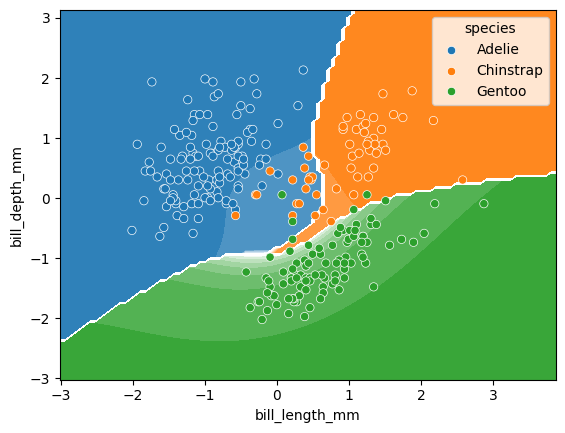

In [17]:
x2 = X_train_scaled[[feature_names[0], feature_names[1]]]

SVM = svm.SVC(kernel='poly', degree=3, C=1.5)
SVM.fit(x2, y_train)

DecisionBoundaryDisplay.from_estimator(SVM, x2) #, ax=ax
sns.scatterplot(x2, x=feature_names[0], y=feature_names[1], hue=dataset['species'])
plt.show()